In [95]:
import numpy as np 
import pandas as pd 
import seaborn as sns


import matplotlib.pyplot as plt
import eda_helper_functions
from sklearn.ensemble import IsolationForest

In [96]:
# Read the training data

file_path = r"/Users/harsimranjitsingh/Desktop/Projects/data/train.csv"

In [97]:

train = pd.read_csv(file_path)
train.isna().sum()


airline            0
date_of_journey    0
source             0
destination        0
dep_time           0
arrival_time       0
duration           0
total_stops        0
additional_info    0
price              0
dtype: int64

In [98]:
train.dtypes
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-06,Delhi,Cochin,18:15:00,19:45:00,1530,1.0,No Info,17024
1,Indigo,2019-03-09,Delhi,Cochin,04:55:00,12:00:00,425,1.0,No Info,6171
2,Air India,2019-06-15,Delhi,Cochin,13:20:00,07:40:00,1100,2.0,No Info,12121
3,Multiple Carriers,2019-03-27,Delhi,Cochin,10:20:00,01:35:00,915,1.0,No Info,6427
4,Jet Airways,2019-05-01,Kolkata,Banglore,21:10:00,04:40:00,450,1.0,In-flight meal not included,10844
...,...,...,...,...,...,...,...,...,...,...
6395,Jet Airways,2019-06-12,Kolkata,Banglore,06:30:00,16:20:00,590,1.0,In-flight meal not included,9899
6396,Indigo,2019-03-06,Delhi,Cochin,11:55:00,22:20:00,625,1.0,No Info,6442
6397,Indigo,2019-05-18,Banglore,Delhi,13:00:00,15:50:00,170,0.0,No Info,4423
6398,Air India,2019-03-06,Delhi,Cochin,07:00:00,19:15:00,735,1.0,No Info,15809


In [99]:

# train.assign(
#     **{
#         col: pd.to_datetime(train.loc[:,col], dayfirst=True, format="mixed")
#         for col in ["date_of_journey","dep_time", "arrival_time" ]
#     })
train = train.assign(
    **{
        col: pd.to_datetime(train.loc[:, col])
        for col in ["date_of_journey", "dep_time", "arrival_time"]
    }
)
train.dtypes
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-06,Delhi,Cochin,2024-05-19 18:15:00,2024-05-19 19:45:00,1530,1.0,No Info,17024
1,Indigo,2019-03-09,Delhi,Cochin,2024-05-19 04:55:00,2024-05-19 12:00:00,425,1.0,No Info,6171
2,Air India,2019-06-15,Delhi,Cochin,2024-05-19 13:20:00,2024-05-19 07:40:00,1100,2.0,No Info,12121
3,Multiple Carriers,2019-03-27,Delhi,Cochin,2024-05-19 10:20:00,2024-05-19 01:35:00,915,1.0,No Info,6427
4,Jet Airways,2019-05-01,Kolkata,Banglore,2024-05-19 21:10:00,2024-05-19 04:40:00,450,1.0,In-flight meal not included,10844
...,...,...,...,...,...,...,...,...,...,...
6395,Jet Airways,2019-06-12,Kolkata,Banglore,2024-05-19 06:30:00,2024-05-19 16:20:00,590,1.0,In-flight meal not included,9899
6396,Indigo,2019-03-06,Delhi,Cochin,2024-05-19 11:55:00,2024-05-19 22:20:00,625,1.0,No Info,6442
6397,Indigo,2019-05-18,Banglore,Delhi,2024-05-19 13:00:00,2024-05-19 15:50:00,170,0.0,No Info,4423
6398,Air India,2019-03-06,Delhi,Cochin,2024-05-19 07:00:00,2024-05-19 19:15:00,735,1.0,No Info,15809


In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6400 non-null   object        
 1   date_of_journey  6400 non-null   datetime64[ns]
 2   source           6400 non-null   object        
 3   destination      6400 non-null   object        
 4   dep_time         6400 non-null   datetime64[ns]
 5   arrival_time     6400 non-null   datetime64[ns]
 6   duration         6400 non-null   int64         
 7   total_stops      6400 non-null   float64       
 8   additional_info  6400 non-null   object        
 9   price            6400 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 500.1+ KB


In [101]:
train.describe(include='number')

,duration,total_stops,price
count,6400.000000,6400.000000,6400.000000
mean,631.732031,0.805781,9078.248906
std,500.100752,0.657174,4666.734199
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5267.000000
50%,505.000000,1.000000,8366.000000
75%,910.000000,1.000000,12373.000000
max,2860.000000,3.000000,79512.000000


In [102]:
(
    train
    .assign(total_stops=train['total_stops'].astype(object))
    .describe(include='O')
)

,airline,source,destination,total_stops,additional_info
count,6400,6400,6400,6400.0,6400
unique,8,5,6,4.0,7
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,2289,2667,2667,3464.0,4982


In [103]:
# High-level analysis of missing values

eda_helper_functions.missing_info(train)


,count,percentage
variable,,


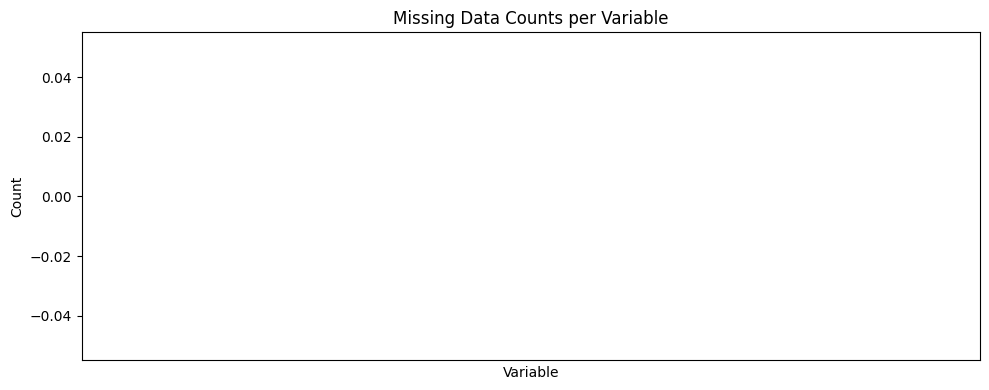

In [104]:
eda_helper_functions.plot_missing_info(train)
train.dropna()
train.isna().sum()
# Drop rows where 'total_stops' is null
train = train.dropna(subset=['total_stops'])

# Verify the rows with null values are dropped
# print(train_cleaned.isnull().sum())


In [105]:
## High level analysis of Outliers
forest = IsolationForest(n_estimators=10, random_state=42)
(
    train
    .assign(outlier=forest.fit_predict(train.drop(columns="price")
                                       .select_dtypes(include='number')))
                                       .query("outlier == -1")
)                                     


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-03-06,Delhi,Cochin,2024-05-19 18:15:00,2024-05-19 19:45:00,1530,1.0,No Info,17024,-1
2,Air India,2019-06-15,Delhi,Cochin,2024-05-19 13:20:00,2024-05-19 07:40:00,1100,2.0,No Info,12121,-1
9,Indigo,2019-03-27,Delhi,Cochin,2024-05-19 05:35:00,2024-05-19 08:50:00,195,0.0,No Info,4729,-1
13,Indigo,2019-05-12,Delhi,Cochin,2024-05-19 05:35:00,2024-05-19 08:50:00,195,0.0,No Info,6015,-1
14,Jet Airways,2019-06-06,Kolkata,Banglore,2024-05-19 20:25:00,2024-05-19 23:35:00,1630,1.0,No Info,14151,-1
...,...,...,...,...,...,...,...,...,...,...,...
6388,Jet Airways,2019-05-18,Delhi,Cochin,2024-05-19 13:25:00,2024-05-19 12:35:00,1390,2.0,No Info,15129,-1
6389,Air India,2019-03-21,Delhi,Cochin,2024-05-19 12:55:00,2024-05-19 19:15:00,1820,2.0,No Info,11228,-1
6392,Jet Airways,2019-06-27,Delhi,Cochin,2024-05-19 20:55:00,2024-05-19 19:00:00,1325,1.0,In-flight meal not included,10262,-1
6394,Jet Airways,2019-06-06,Delhi,Cochin,2024-05-19 05:30:00,2024-05-19 19:00:00,810,2.0,No Info,13292,-1


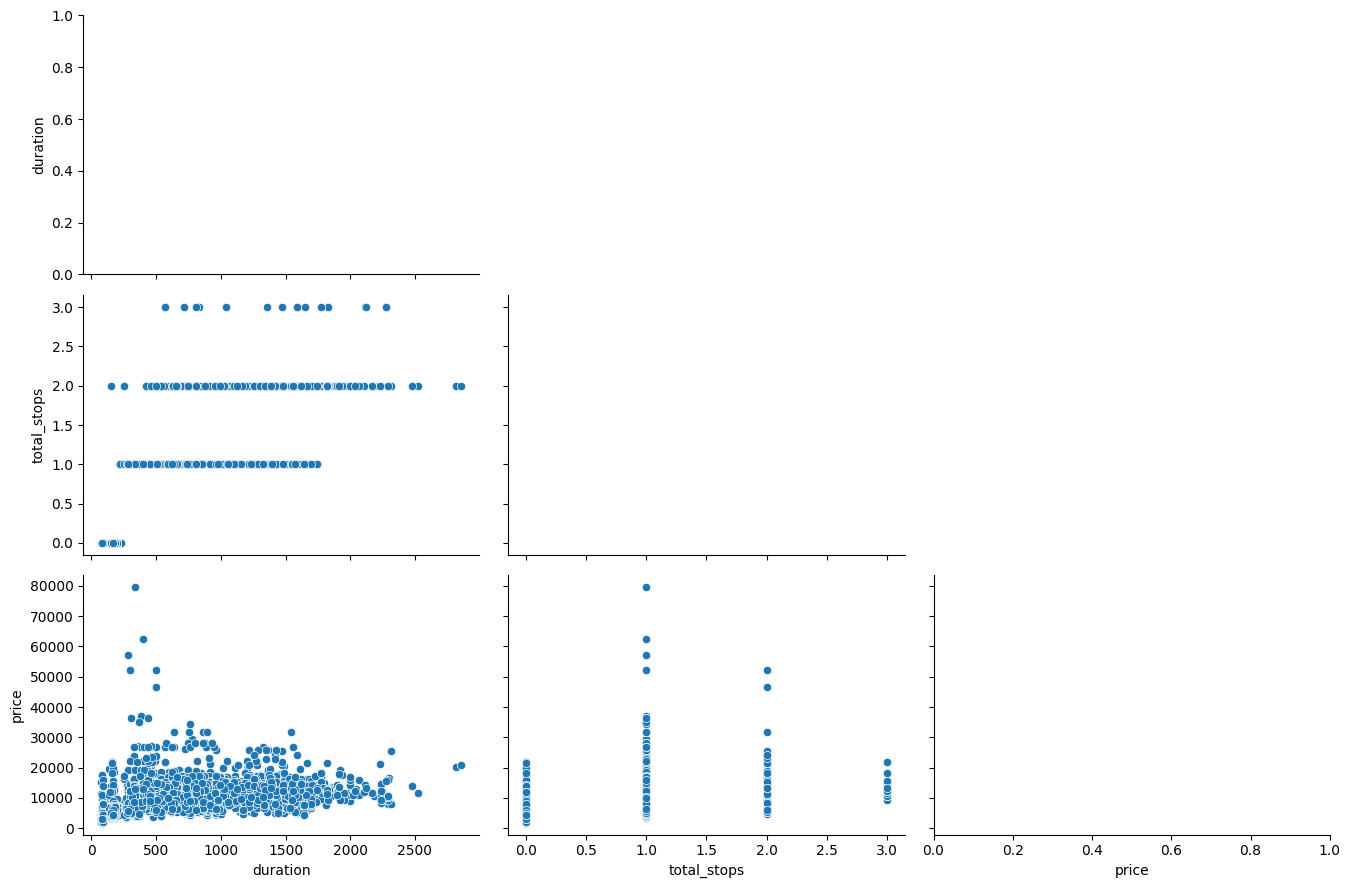

In [106]:
# pair pltos

eda_helper_functions.pair_plots(train)

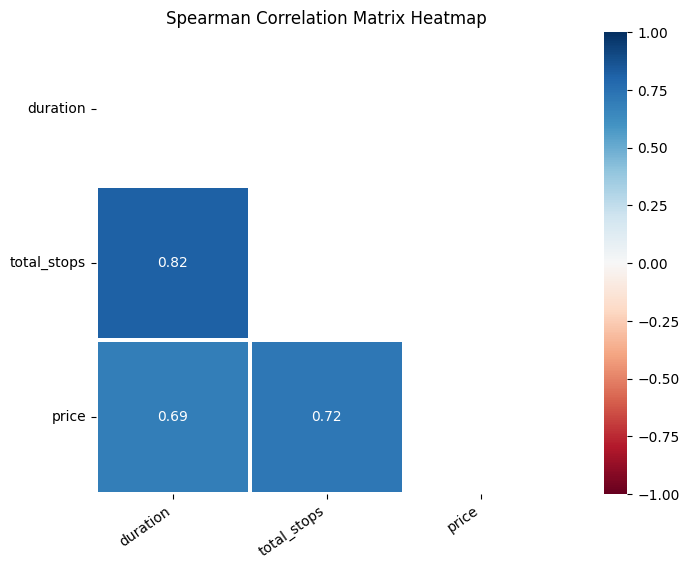

In [107]:
eda_helper_functions.correlation_heatmap(train)

In [108]:
train.corr(method="spearman", numeric_only=True)

,duration,total_stops,price
duration,1.000000,0.816877,0.694045
total_stops,0.816877,1.000000,0.719311
price,0.694045,0.719311,1.000000


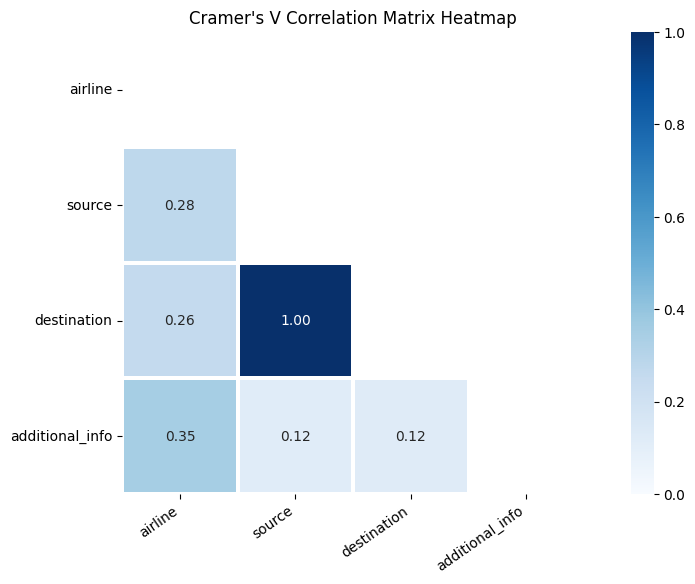

In [109]:
eda_helper_functions.cramersV_heatmap(train)

In [110]:
train.columns



Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

In [111]:
# airline
eda_helper_functions.cat_summary(train, "airline")

0             Jet Airways
1                  Indigo
2               Air India
3       Multiple Carriers
4             Jet Airways
              ...        
6395          Jet Airways
6396               Indigo
6397               Indigo
6398            Air India
6399            Air India
Name: airline, Length: 6400, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,400 / 6,400 rows


,
count,6400
unique,8
top,Jet Airways
freq,2289


,count,percentage
category,,
Jet Airways,2289,0.357656
Indigo,1229,0.192031
Air India,1024,0.160000
Multiple Carriers,759,0.118594
Spicejet,514,0.080312
Vistara,275,0.042969
Air Asia,189,0.029531
Goair,121,0.018906


NameError: name 'WordCloud' is not defined

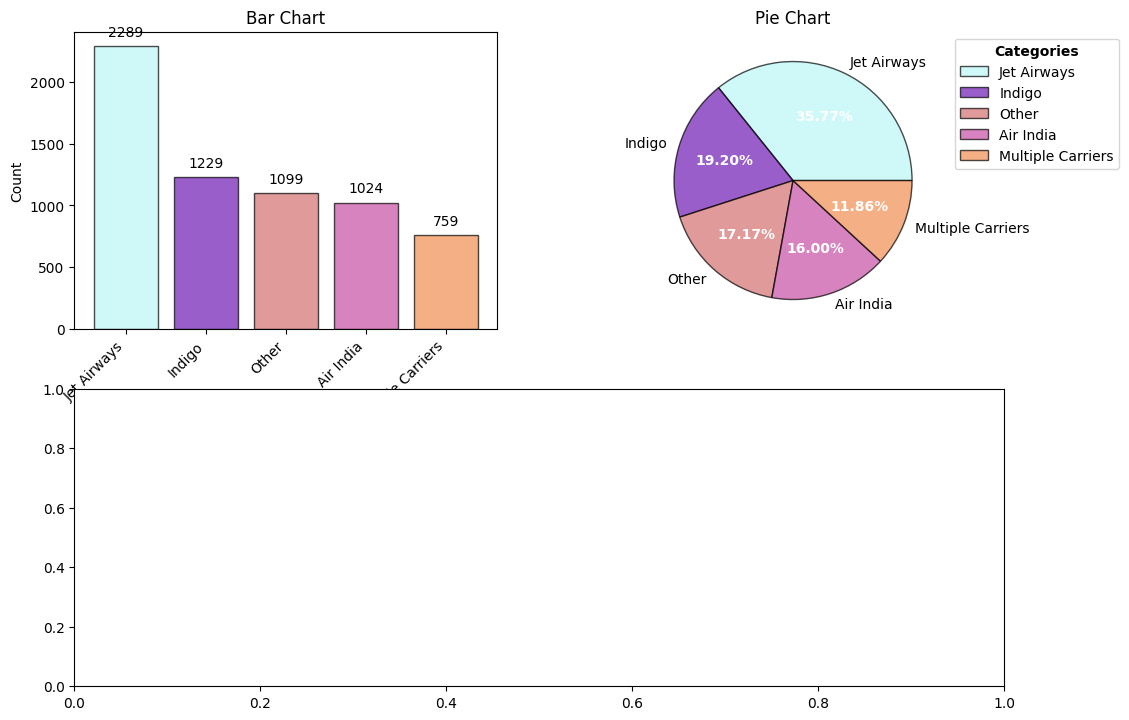

In [112]:
eda_helper_functions.cat_univar_plots(train, "airline", k=4)

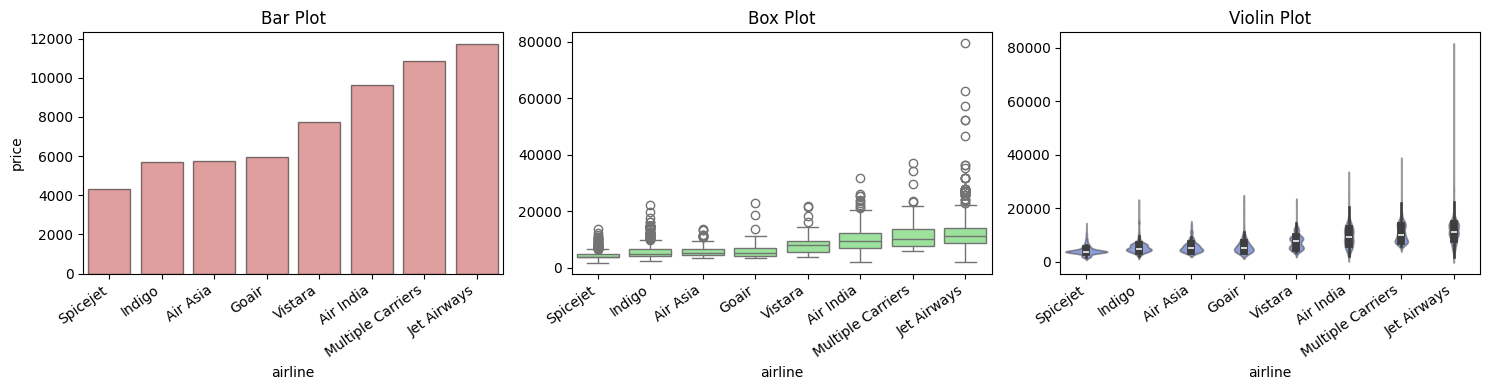

In [ ]:
eda_helper_functions.num_cat_bivar_plots(data=train, num_var="price", cat_var="airline")

In [ ]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline",)

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 485.25032580113236
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 2921.209866439087
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


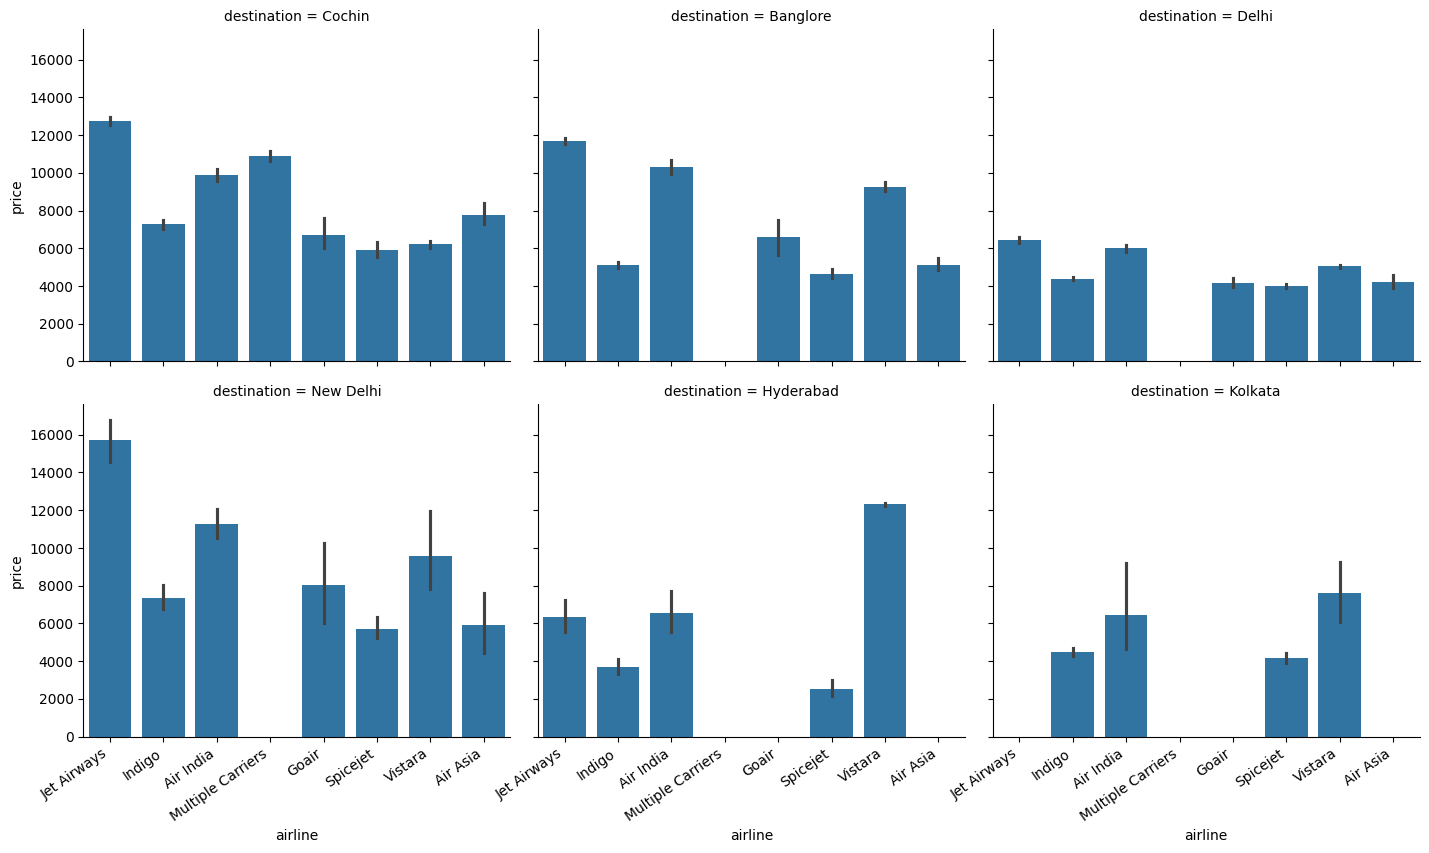

In [ ]:
ariline_grid = sns.FacetGrid(
    data=train,
    col="destination",
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True
)
ariline_grid.map(sns.barplot, "airline", "price")

for ax in ariline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

In [ ]:
# date of journey

train.date_of_journey

0      2019-03-06
1      2019-03-09
2      2019-06-15
3      2019-03-27
4      2019-05-01
          ...    
6395   2019-06-12
6396   2019-03-06
6397   2019-05-18
6398   2019-03-06
6399   2019-05-01
Name: date_of_journey, Length: 6400, dtype: datetime64[ns]

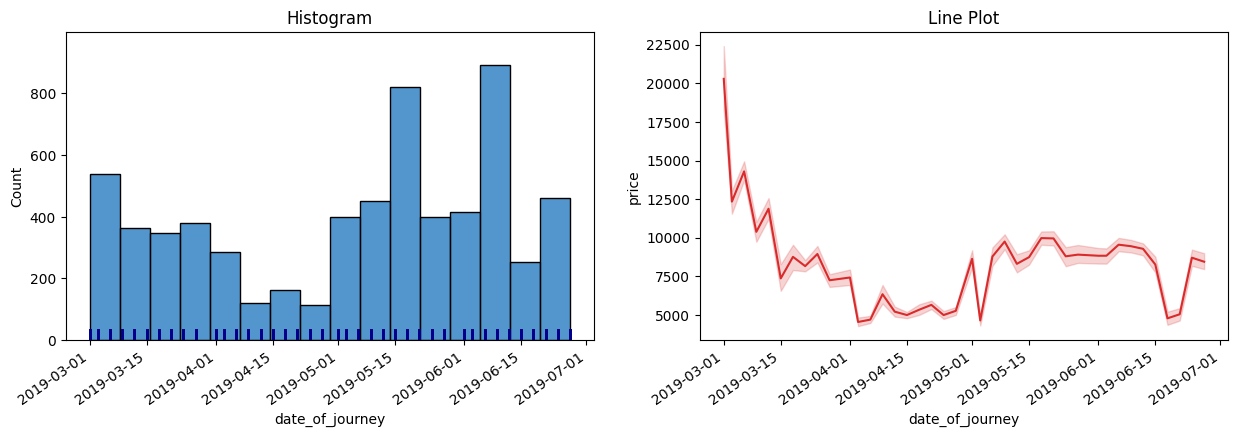

In [ ]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var="date_of_journey",
    target="price"
)

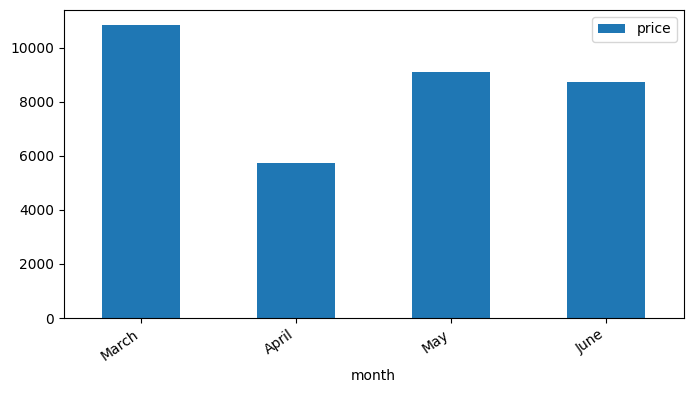

In [ ]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index="month")
    .plot(kind="bar", figsize=(8,4))
)

ax  = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

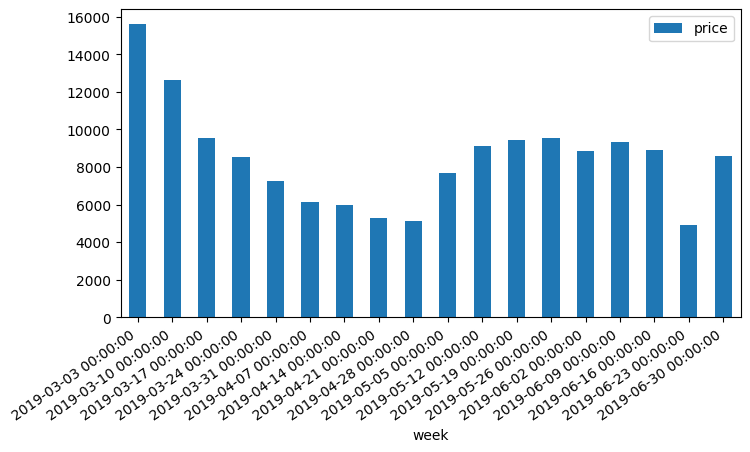

In [ ]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="W"))
    .price.mean()
    .to_frame()
    # .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index="week")
    .plot(kind="bar", figsize=(8,4))
)

ax  = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

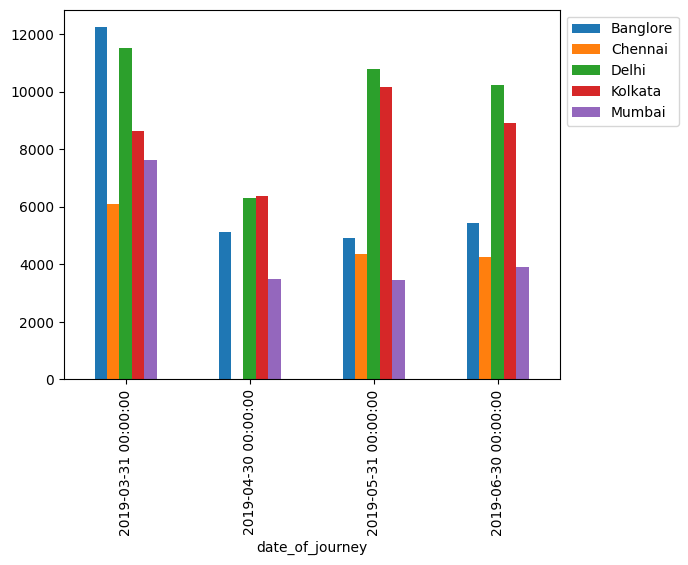

In [ ]:
(
    train
    .groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
    .price.mean()
    .unstack()
    .plot(kind="bar")
)
ax = plt.gca()
ax.legend(
    loc="upper left",
    bbox_to_anchor=(1,1)
)

In [ ]:
# dept_time
train.dep_time

0      2024-05-19 18:15:00
1      2024-05-19 04:55:00
2      2024-05-19 13:20:00
3      2024-05-19 10:20:00
4      2024-05-19 21:10:00
               ...        
6395   2024-05-19 06:30:00
6396   2024-05-19 11:55:00
6397   2024-05-19 13:00:00
6398   2024-05-19 07:00:00
6399   2024-05-19 09:50:00
Name: dep_time, Length: 6400, dtype: datetime64[ns]

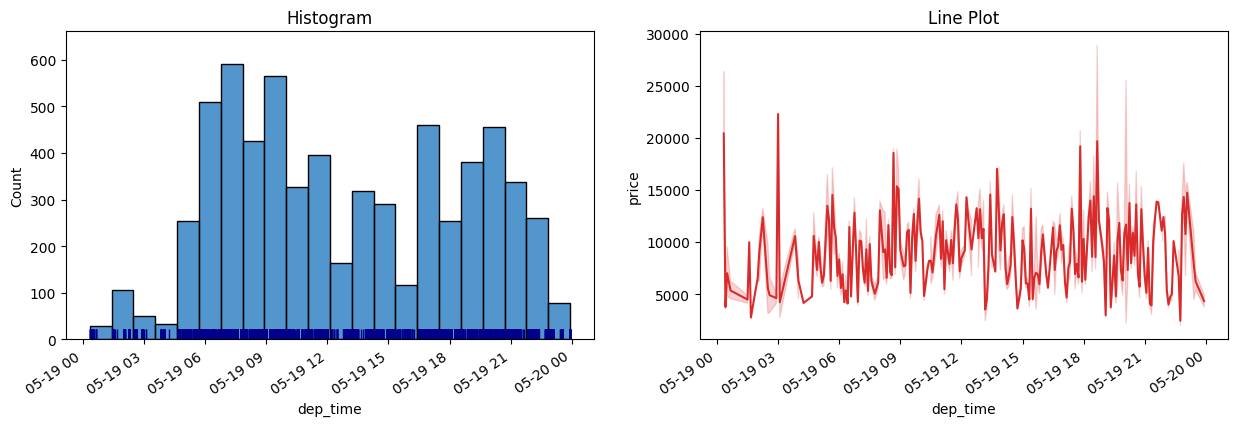

In [ ]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

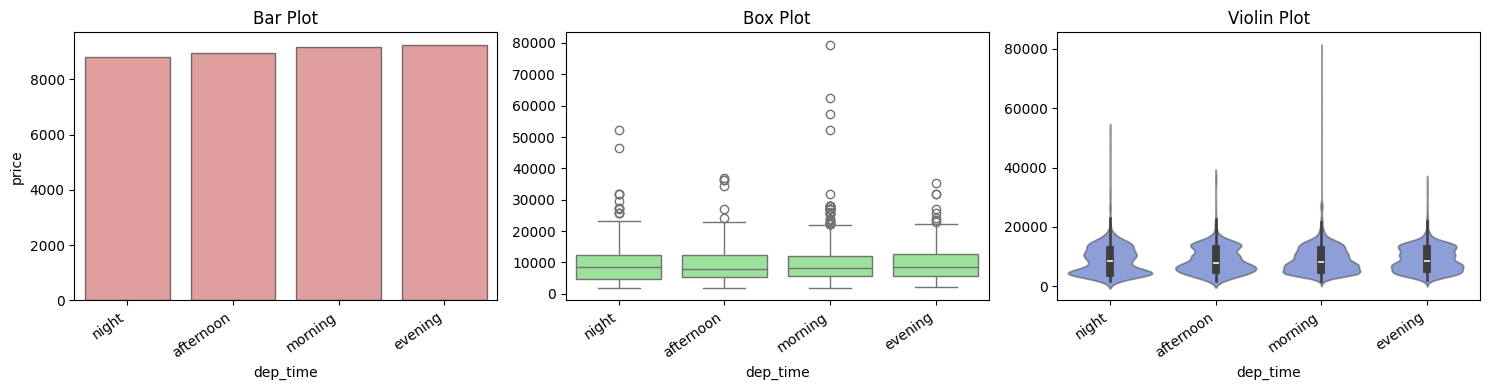

In [ ]:
(
    train
    .assign(dep_time=lambda df_ : (
        np.select([df_.dep_time.dt.hour.between(4,12, inclusive="left"), df_.dep_time.dt.hour.between(12,16, inclusive="left"), df_.dep_time.dt.hour.between(16,20, inclusive="left")],["morning", "afternoon", "evening"], default="night")
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")

)

In [113]:
#duration

train.duration
eda_helper_functions.num_summary(train, "duration")

0       1530
1        425
2       1100
3        915
4        450
        ... 
6395     590
6396     625
6397     170
6398     735
6399    1385
Name: duration, Length: 6400, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,400 / 6,400 rows


,value
percentile,
0,75.0
5,90.0
10,150.0
25,170.0
50,505.0
75,910.0
90,1440.0
95,1600.0
99,1855.0


,value
mean,631.732031
trimmed mean (5%),598.430556
trimmed mean (10%),569.219727
median,505.000000


,value
var,250100.761906
std,500.100752
IQR,740.000000
mad,335.000000
coef_variance,0.791634


,value
skewness,0.902692
kurtosis,-0.065543


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 0.8848545551300049
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 242.67439296326393
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


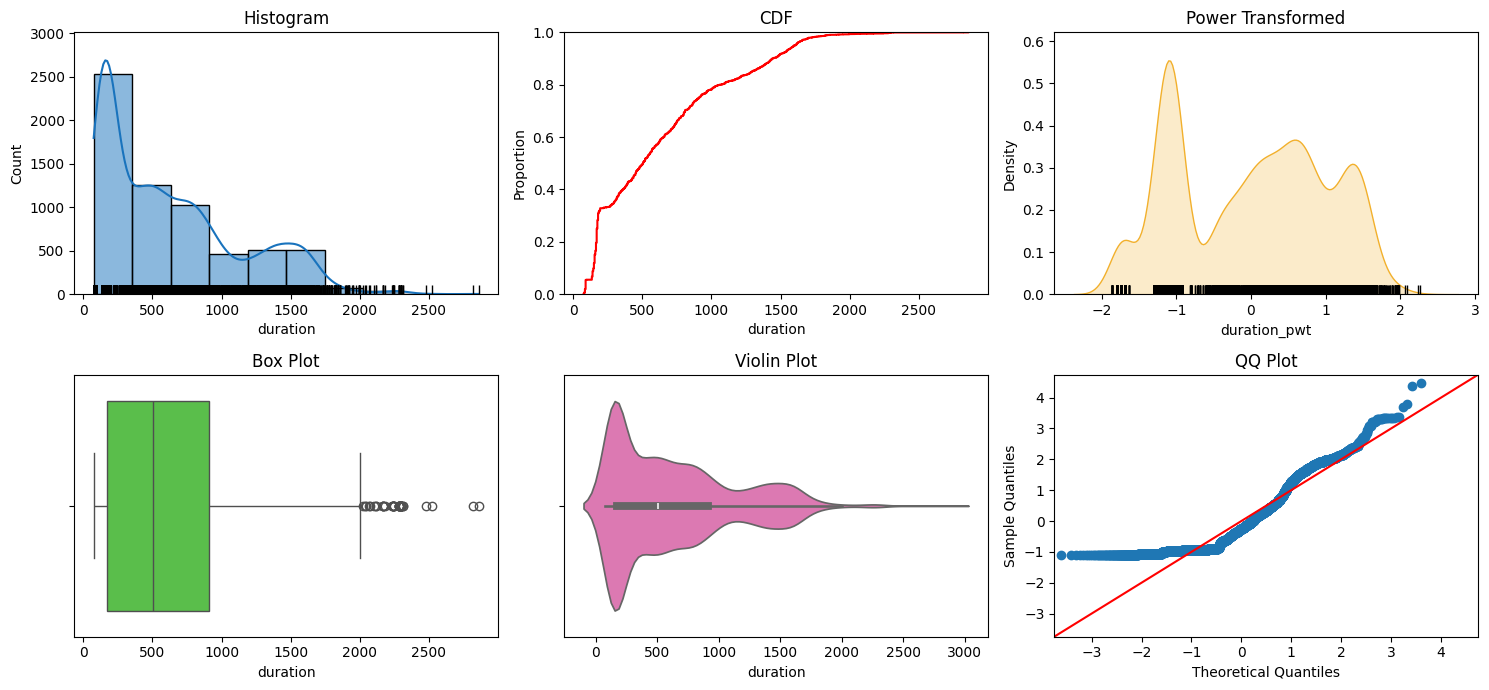

In [114]:
eda_helper_functions.num_univar_plots(train, "duration")

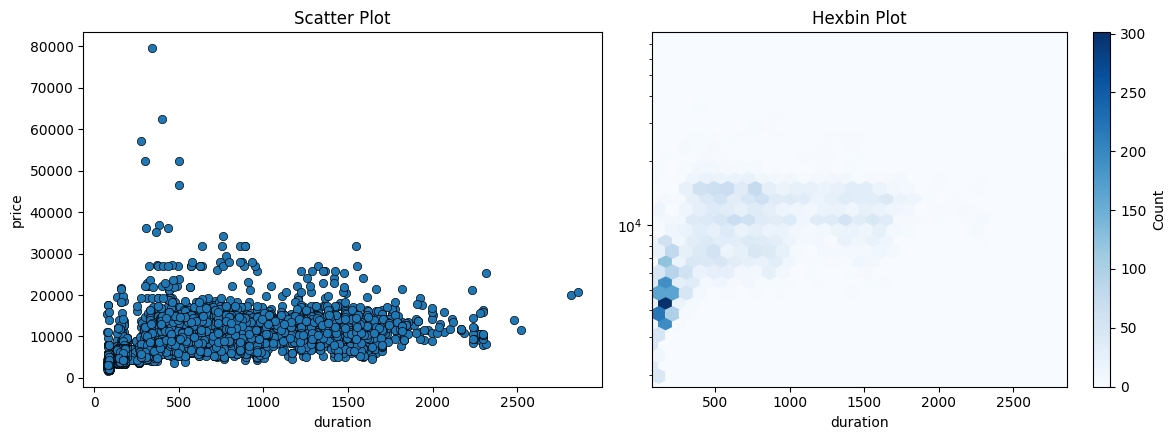

In [118]:
eda_helper_functions.num_bivar_plots(train, "duration", "price", hexbin_kwargs=dict(
    yscale="log",
    gridsize=30,
    cmap="Blues"
))

In [119]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.4955343714894065
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6940447149388933
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


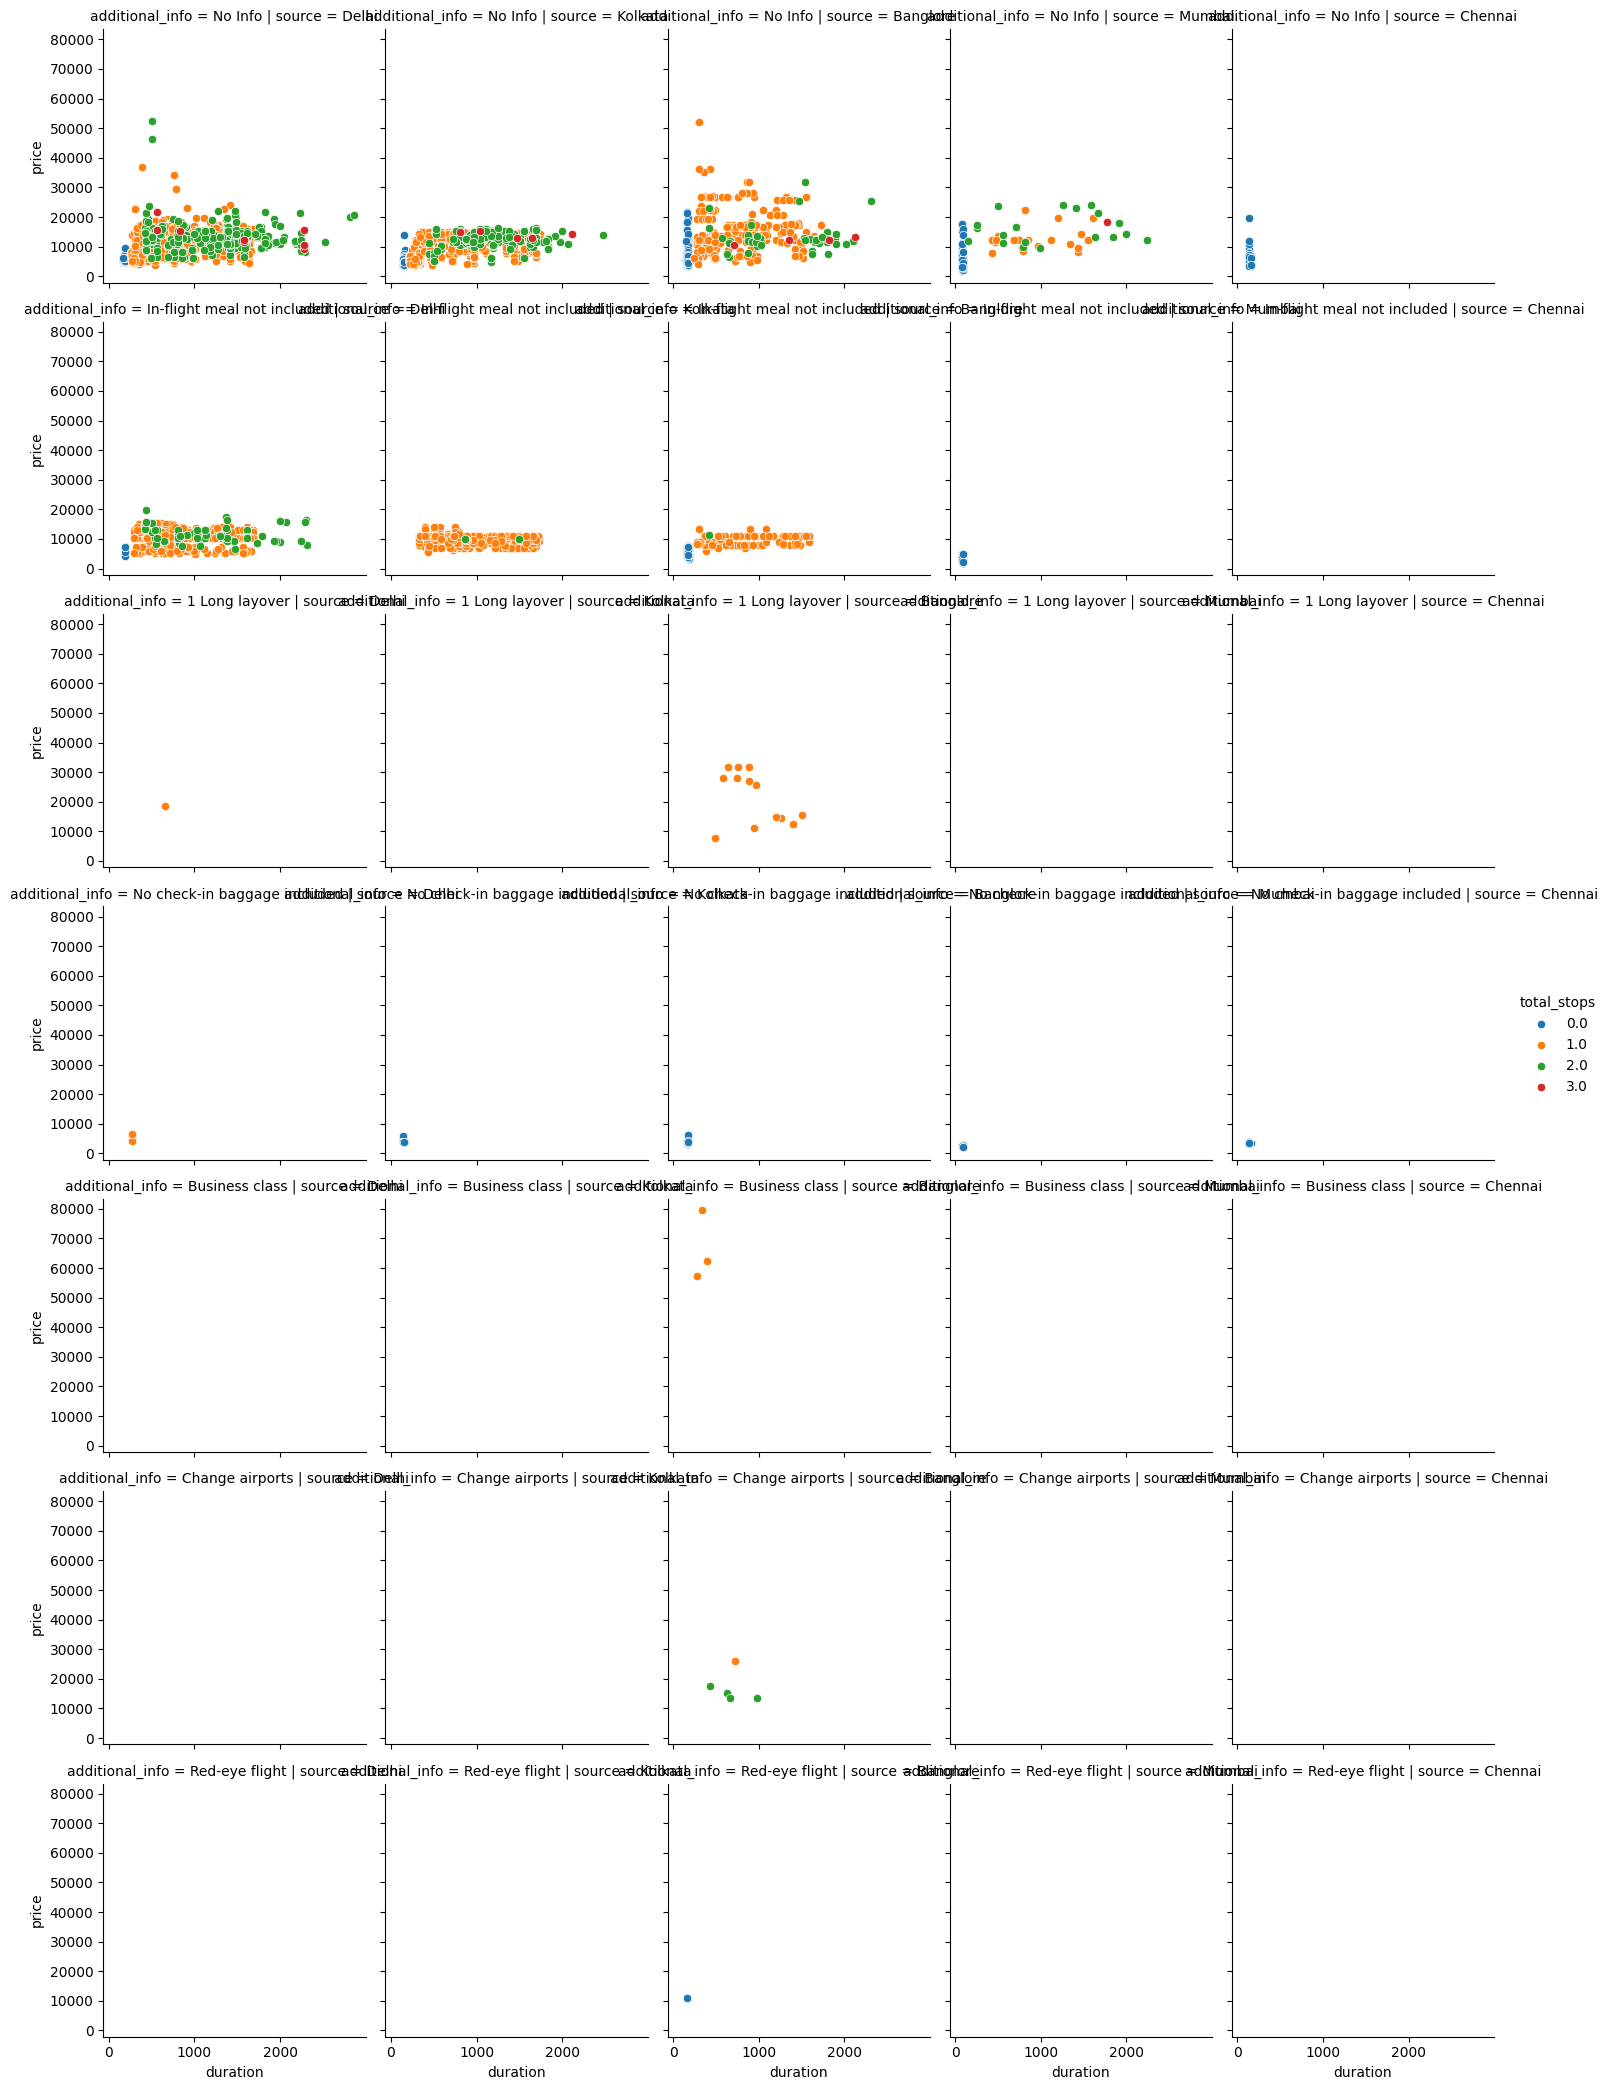

In [126]:
duration_gird = sns.FacetGrid(
    data=train, 
    col="source",
    hue="total_stops",
    row="additional_info",
    
    sharey=True,
)
duration_gird.map(sns.scatterplot, "duration", "price")
duration_gird.add_legend()

In [ ]:
# Automated eda

# pandasd profliing

In [127]:
!pip install ydata-profiling


error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-brew-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip.
    
    If you wish to install a non-brew packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detailed specification.


In [128]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -940.0
Upper Limit : 2020.0


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
5036,Air India,2019-03-18,Banglore,New Delhi,2024-05-19 06:45:00,2024-05-19 16:30:00,2025,2.0,No Info,10835
6277,Jet Airways,2019-03-21,Delhi,Cochin,2024-05-19 18:25:00,2024-05-19 04:25:00,2040,2.0,No Info,12347
371,Jet Airways,2019-03-21,Delhi,Cochin,2024-05-19 18:20:00,2024-05-19 04:25:00,2045,2.0,No Info,13082
1178,Air India,2019-05-01,Kolkata,Banglore,2024-05-19 05:50:00,2024-05-19 16:15:00,2065,2.0,No Info,10991
1402,Jet Airways,2019-03-06,Delhi,Cochin,2024-05-19 17:55:00,2024-05-19 04:25:00,2070,2.0,In-flight meal not included,15812
1350,Air India,2019-03-03,Banglore,New Delhi,2024-05-19 11:05:00,2024-05-19 22:10:00,2105,2.0,No Info,11791
4149,Air India,2019-03-24,Kolkata,Banglore,2024-05-19 12:00:00,2024-05-19 23:15:00,2115,3.0,No Info,14221
5821,Air India,2019-03-12,Banglore,New Delhi,2024-05-19 06:45:00,2024-05-19 18:05:00,2120,3.0,No Info,13387
4209,Air India,2019-03-09,Delhi,Cochin,2024-05-19 07:05:00,2024-05-19 19:15:00,2170,2.0,No Info,11762
3178,Air India,2019-03-03,Delhi,Cochin,2024-05-19 07:05:00,2024-05-19 19:15:00,2170,2.0,No Info,11762
